In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("1000_Amazon_review_anusha.csv")

In [3]:
df.head(11)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,B0007SVD9M,ATDTM14U5KFVT,Keith Hough,1,1,Negative Review,They changed the flavor and it is not good.,I've been ordering cases of Altoids for years ...
1,B002HFWMOI,A2O0JY6777FXXU,Michelle,3,3,Positive Review,"Good, but Amazon has the flavor names wrong",Flavor names vs flavor photos are pretty confu...
2,B002ACQHDA,AS0SPE5TEM74Z,Elizabeth Kingsley,0,0,Positive Review,Excellent flavor.,Actually does taste like creme brulee. Makes ...
3,B004XTDMOA,A37QTP674OKCU,Michael A. Cutting,0,0,Negative Review,Crap,I normally buy maruchan ramen and just add cur...
4,B004YV80OE,A2QR043WBXXX6L,Stephen Cunningham,3,4,Negative Review,Broccoli in this? Really?,"Well, I have to admit to being very disappoint..."
5,B0059YB39O,A93AG3JQQVXOZ,R. Valley,0,0,Negative Review,Regular is Salty--Peppered is Great,I would say I get less salt from sucking on a ...
6,B001BS4G6O,AM76TKHVICZC6,Gertrud Kahler,0,0,Positive Review,"mmm, mmmm, good!",My dog loves these. Totally unaware that she i...
7,B003N0ZEKU,A2GRVML0NK37PQ,Dora C. Zuses,0,0,Positive Review,yummy butter toffee,Really good coffe tasty not to strong since I'...
8,B002LANN56,A1JISH2AQDW1YW,QueenKatieMae,3,3,Negative Review,Dog rating: 5 stars. Human rating: 1 star.,My dog devoured this stuff like she was starve...
9,B00455QA00,A2DNWHJR198MKZ,hupi,0,0,Negative Review,Worst Smell,I was very disappointed with this product. The...


In [4]:
import re

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

In [5]:
df['Text'] = df['Text'].apply(cleanhtml)

In [6]:
df.isnull().any()

ProductId                 False
UserId                    False
ProfileName               False
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Score                     False
Summary                   False
Text                      False
dtype: bool

In [7]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

There are 2000 rows and 8 columns

In [8]:
negative_reviews_data = df[df['Score']=='Negative Review']['Summary'].values

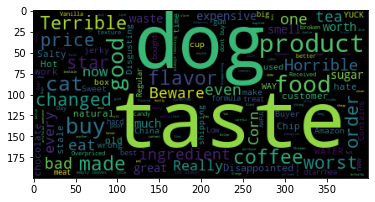

In [9]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords=stopwords).generate(''.join(negative_reviews_data))
plt.imshow(wordcloud)
plt.show()

In [10]:
positive_reviews_data = df[df['Score']=='Positive Review']['Text'].values

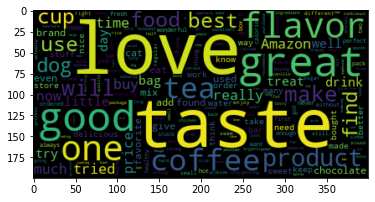

In [11]:
wordcloud = WordCloud().generate(''.join(positive_reviews_data))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# Dropping Null values

In [12]:
df.dropna(inplace= True)

In [13]:
df.shape


(2000, 8)

There is no null values in the dataset

# Drop duplicates

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(2000, 8)

There are no duplicates in the dataset

# Describe data

In [16]:
df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator
count,2000.000000,2000.000000
mean,2.235500,3.543500
std,10.491381,11.730171
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,4.000000
max,406.000000,415.000000


<b>HelpfulnessNumerator:</b><br> count is 2000.000000 <br>
                          mean is 2.235500 <br>
                          std is 10.491381 <br>
                          min is 0.000000   <br>
                          25% is 0.000000   <br>
                          50% is 1.000000   <br>
                          75% is 2.000000    <br>
                          max is 406.000000   <br>
                     
<b>HelpfulnessDenominator:</b> <br> count is 2000.000000 <br>
                                    mean is 3.543500   <br>
                                    std is 11.730171   <br>
                                    min is 0.000000    <br>
                                    25% is 0.000000    <br>
                                     50% is 1.000000    <br>
                                     75% is 4.000000    <br>
                                      max is 415.000000    <br>
                     

# Analysis of data

In [17]:
column1 =df["HelpfulnessNumerator"]

In [18]:
column1.values

array([1, 3, 0, ..., 0, 5, 0], dtype=int64)

In [19]:
import seaborn

C:\Users\solan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

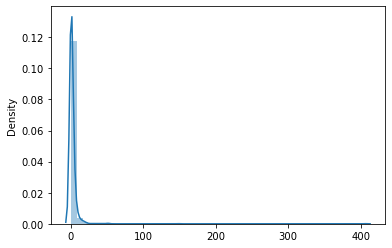

In [20]:
seaborn.distplot(column1.values)

In [21]:
column2 =df["HelpfulnessDenominator"]

In [22]:
column2.values

array([1, 3, 0, ..., 0, 5, 0], dtype=int64)

C:\Users\solan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

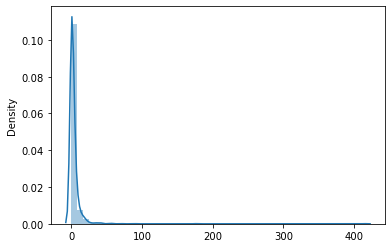

In [23]:
seaborn.distplot(column2.values)

There are outliers in the dataset

# Data preparation 

In [24]:
x= df[["ProductId", "UserId", "ProfileName", "HelpfulnessNumerator", "HelpfulnessDenominator", "Summary", "Text"]]

In [25]:
y= df[["Score"]].values

In [26]:
x.shape,y.shape

((2000, 7), (2000, 1))

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [29]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((1500, 7), (500, 7), (1500, 1), (500, 1))

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vec = CountVectorizer()

x_train = vec.fit_transform(x_train["Text"].values)
x_test = vec.transform(x_test["Text"].values)

In [32]:
 y_test

array([['Negative Review'],
       ['Negative Review'],
       ['Positive Review'],
       ['Negative Review'],
       ['Negative Review'],
       ['Negative Review'],
       ['Negative Review'],
       ['Positive Review'],
       ['Negative Review'],
       ['Negative Review'],
       ['Negative Review'],
       ['Positive Review'],
       ['Negative Review'],
       ['Negative Review'],
       ['Negative Review'],
       ['Positive Review'],
       ['Negative Review'],
       ['Positive Review'],
       ['Negative Review'],
       ['Negative Review'],
       ['Negative Review'],
       ['Positive Review'],
       ['Negative Review'],
       ['Negative Review'],
       ['Negative Review'],
       ['Positive Review'],
       ['Negative Review'],
       ['Positive Review'],
       ['Positive Review'],
       ['Negative Review'],
       ['Positive Review'],
       ['Positive Review'],
       ['Positive Review'],
       ['Positive Review'],
       ['Negative Review'],
       ['Positive Re

In [33]:
for i in range(0,y_train.shape[0]):
    if(y_train[i]=="Negative Review"):
        y_train[i] = 0
    else:
        y_train[i] = 1

In [34]:
for i in range(0,y_test.shape[0]):
    if(y_test[i]=="Negative Review"):
        y_test[i] = 0
    else:
        y_test[i] = 1

# Logistic Regression

In [35]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression(solver='lbfgs')
model.fit(x_train,y_train.astype(int).ravel())
pred = model.predict(x_test)

C:\Users\solan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,y_test.astype(int))

In [39]:
print("The Accuracy of the model is :",acc*100)

The Accuracy of the model is : 84.0


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,y_test.astype(int))

array([[223,  42],
       [ 38, 197]], dtype=int64)

## Decison Trees 

In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train,y_train.astype(int))
pred = model.predict(x_test)

In [42]:
acc = accuracy_score(pred,y_test.astype(int))

In [43]:
print("The Accuracy of the model is :",acc*100)

The Accuracy of the model is : 69.39999999999999


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,y_test.astype(int))

array([[188,  80],
       [ 73, 159]], dtype=int64)

# ANN(Artifical Neural Networks)

In [45]:
from keras.models import Sequential

In [46]:
x_train = x_train.astype(int)

In [47]:
y_train = y_train.astype(int)

In [48]:
y_train_ = tf.one_hot(y_train, depth=2).numpy()[:,0,:]

NameError: name 'tf' is not defined

In [ ]:
from tensorflow.keras.layers import Dense
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x_train, y_train, batch_size=32, epochs=20)

In [ ]:
model.summary()

In [ ]:

Prd = model.predict(x_test.toarray().astype(int))

prd = [1 if x>0.5 else 0 for x in Prd]
# Prd = np.argmax(Prd,axis=1)

In [ ]:
accr= accuracy_score(prd,y_test.astype(int))
print("The Accuracy of the model is :",accr*100)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(prd,y_test.astype(int))

In [ ]:
!pip install prettytable

In [ ]:
from prettytable import PrettyTable

myTable = PrettyTable(["Model Name", "Accuracy", "True Positives", "True Negatives"])
  
myTable.add_row(["Logistic Regression", "82.6%", "211", "201"])
myTable.add_row(["Decision Tree Classifier", "71.6%", "191", "167"])
myTable.add_row(["ANN", "84.8%", "215", "209"])

  
print(myTable)

# Tuning Hyperparameteres

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from datetime import datetime
start = str(datetime.now())
def build_classifier(optimizer, nh1, nh2, nh3):
    classifier = Sequential()
    classifier.add(Dense(units = nh1, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1677))
    classifier.add(Dense(units = nh2, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = nh3, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['auc_score'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'optimizer': ['adam','rmsprop'],
             'nh1' : [256, 128, 64],
             'nh2' : [128, 64, 32],
             'nh3' : [64, 32, 16]}
grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 3)
grid_search = grid_search.fit(x_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
end = str(datetime.now())
print('Start time:  ' + start)
print('End time:  ' + end)
                         
                


In [ ]:
y_train_